In [24]:
import json
import numpy as np
import matplotlib.pyplot as plt

f = open('wavefront_runtime.json')
data = json.load(f)

length = min(len(data["runtime_ff"]), len(data["runtime_mpi"]))

T_seq = data["T_seq"]
processors = data["processors"][0:length]
runtime_ff = data["runtime_ff"][0:length]
runtime_mpi = data["runtime_mpi"][0:length]

In [25]:
def overlap_functions(
        x_data,
        y1_data,
        y2_data,
        x_label,
        y_label,
        f1_label,
        f2_label,
        title
):
    plt.plot(x_data, y1_data, label=f1_label, color='blue', linewidth=2)
    plt.plot(x_data, y2_data, label=f2_label, color='red', linewidth=2)

    overlap = np.abs(np.array(y1_data) - np.array(y2_data)) < 0.1
    plt.fill_between(processors, y1_data, y2_data, where=overlap, color='gray', alpha=0.5)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)
    plt.legend()

    plt.grid(True)
    plt.show()

### Runtime Plot

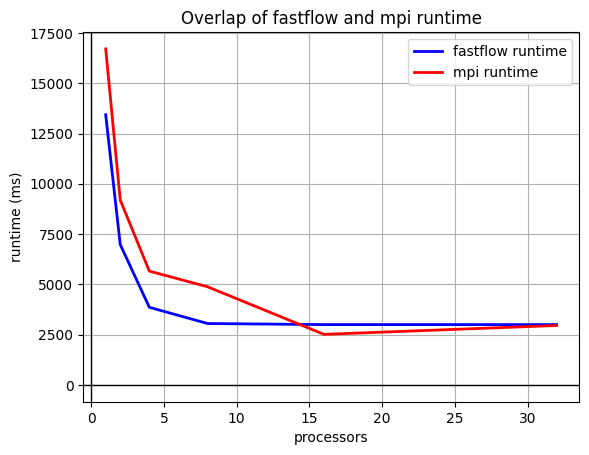

In [26]:
overlap_functions(
    processors,
    runtime_ff,
    runtime_mpi,
    "processors",
    "runtime (ms)",
    "fastflow runtime",
    "mpi runtime",
    "Overlap of fastflow and mpi runtime"
)

### Speedup plot

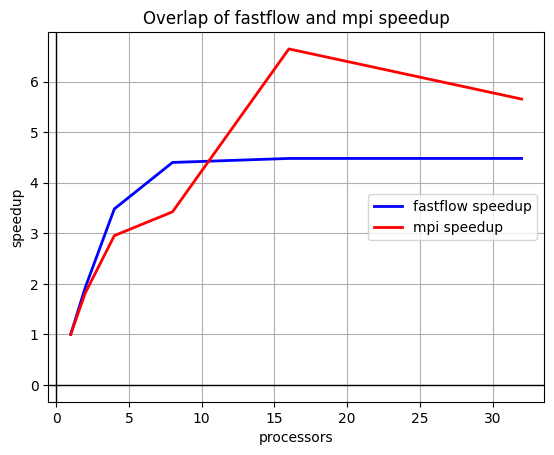

In [27]:
speedup_ff = [runtime_ff[0] / r for r in runtime_ff]
speedup_mpi = [runtime_mpi[0] / r for r in runtime_mpi]

overlap_functions(
    processors,
    speedup_ff,
    speedup_mpi,
    "processors",
    "speedup",
    "fastflow speedup",
    "mpi speedup",
    "Overlap of fastflow and mpi speedup"
)

### Cost plot

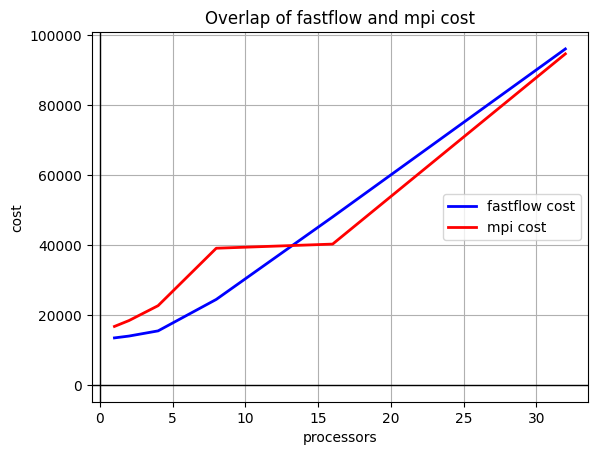

In [28]:
cost_ff = [r * p for r, p in zip(runtime_ff, processors)]
cost_mpi = [r * p for r, p in zip(runtime_mpi, processors)]

overlap_functions(
    processors,
    cost_ff,
    cost_mpi,
    "processors",
    "cost",
    "fastflow cost",
    "mpi cost",
    "Overlap of fastflow and mpi cost"
)

### Efficency plot

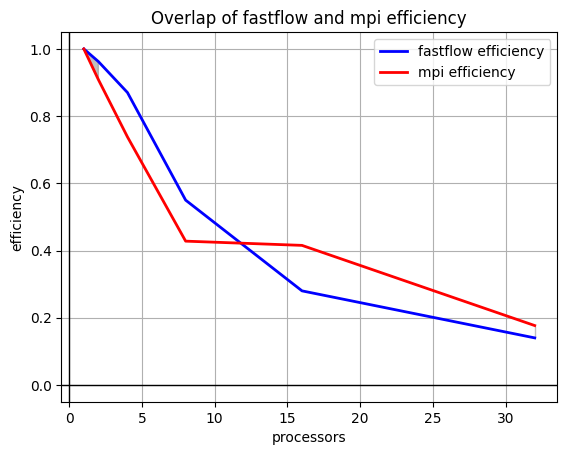

In [29]:
efficiency_ff = [s / p for s, p in zip(speedup_ff, processors)]
efficiency_mpi = [s / p for s, p in zip(speedup_mpi, processors)]

overlap_functions(
    processors,
    efficiency_ff,
    efficiency_mpi,
    "processors",
    "efficiency",
    "fastflow efficiency",
    "mpi efficiency",
    "Overlap of fastflow and mpi efficiency"
)
